<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/Covid_19_on_Working_Professionals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#import dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("willianoliveiragibin/covid-19-on-working-professionals")

print("Path to dataset files:", path)

100%|██████████| 255k/255k [00:00<00:00, 41.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/willianoliveiragibin/covid-19-on-working-professionals/versions/1


In [3]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/refs/heads/main/helper_functions.py

--2025-01-06 07:39:47--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10247 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-01-06 07:39:47 (69.3 MB/s) - ‘helper_functions.py’ saved [10247/10247]



In [4]:
from helper_functions import *

In [7]:
data = unzip_data("/content/archive (7).zip")

In [8]:
df = pd.read_csv("/content/covid_impact_on_work new.csv")

In [9]:
df

,Stress_Level,Sector,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Affected_by_Covid
0,Low,Retail,1,1,6.392.393.639.805.820,26.845.944.014.488.700,1,0,0,1,1,1,0,1,1
1,Low,IT,1,1,9.171.983.537.957.560,33.392.245.834.602.800,1,0,1,0,1,1,0,1,1
2,Medium,Retail,1,0,10.612.560.951.456.400,2.218.332.712.302.110,0,0,0,0,0,0,0,0,1
3,Medium,Education,1,1,5.546.168.647.409.510,5.150.566.193.312.910,0,0,0,0,1,0,0,0,1
4,Medium,Education,0,1,11.424.615.456.733.800,31.211.255.258.841.200,1,0,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Medium,IT,1,1,7.961.822.499.528.110,228.385.715.074.039,1,1,1,1,0,0,0,1,1
9996,Medium,IT,0,0,10.917.085.531.320.900,36.214.061.959.290.800,0,0,0,1,0,1,0,0,1
9997,Low,Retail,1,1,1.017.621.058.520.080,10.396.886.350.092.200,1,0,1,0,1,1,1,1,1
9998,Medium,Education,1,1,11.903.972.863.377.200,3.756.724.961.448.690,0,1,1,0,1,1,1,1,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Stress_Level                   10000 non-null  object
 1   Sector                         10000 non-null  object
 2   Increased_Work_Hours           10000 non-null  int64 
 3   Work_From_Home                 10000 non-null  int64 
 4   Hours_Worked_Per_Day           10000 non-null  object
 5   Meetings_Per_Day               10000 non-null  object
 6   Productivity_Change            10000 non-null  int64 
 7   Health_Issue                   10000 non-null  int64 
 8   Job_Security                   10000 non-null  int64 
 9   Childcare_Responsibilities     10000 non-null  int64 
 10  Commuting_Changes              10000 non-null  int64 
 11  Technology_Adaptation          10000 non-null  int64 
 12  Salary_Changes                 10000 non-null  int64 
 13  Te

In [11]:
df.describe()

,Increased_Work_Hours,Work_From_Home,Productivity_Change,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Affected_by_Covid
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0
mean,0.676900,0.803300,0.50220,0.301100,0.404900,0.396700,0.50220,0.605100,0.194800,0.700600,1.0
std,0.467684,0.397523,0.50002,0.458759,0.490897,0.489237,0.50002,0.488854,0.396066,0.458018,0.0
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0
50%,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000,1.0
75%,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,1.0
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.0


In [14]:
df.isna().sum()

,0
Stress_Level,0
Sector,0
Increased_Work_Hours,0
Work_From_Home,0
Hours_Worked_Per_Day,0
Meetings_Per_Day,0
Productivity_Change,0
Health_Issue,0
Job_Security,0
Childcare_Responsibilities,0


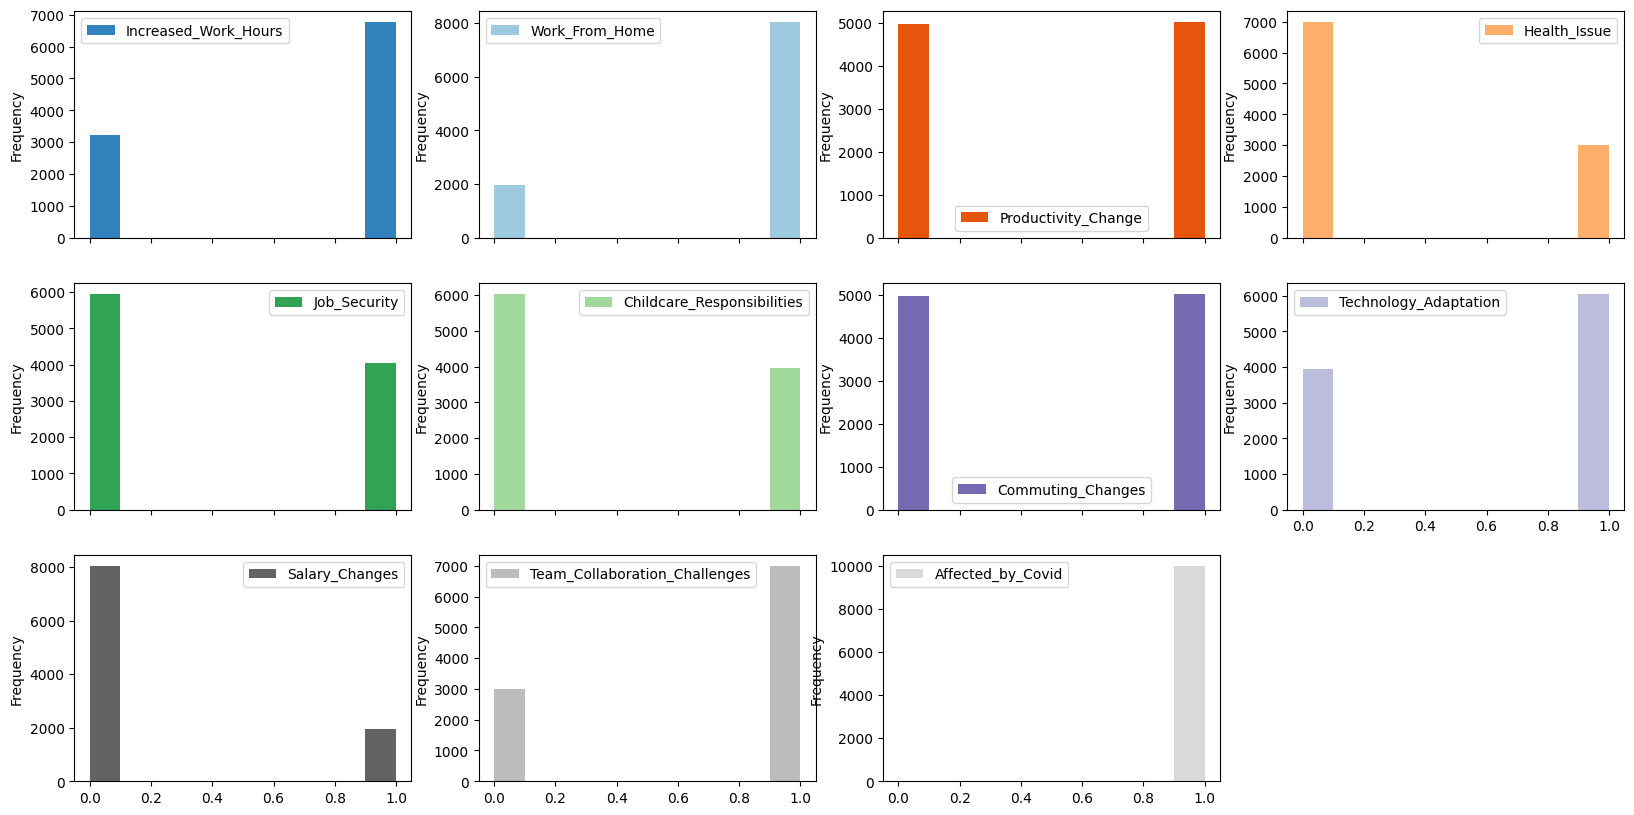

In [25]:
df.plot(kind='hist',subplots=True,layout=(3,4), figsize=(20,10), bins=10, use_index=False, colormap='tab20c')
plt.show();

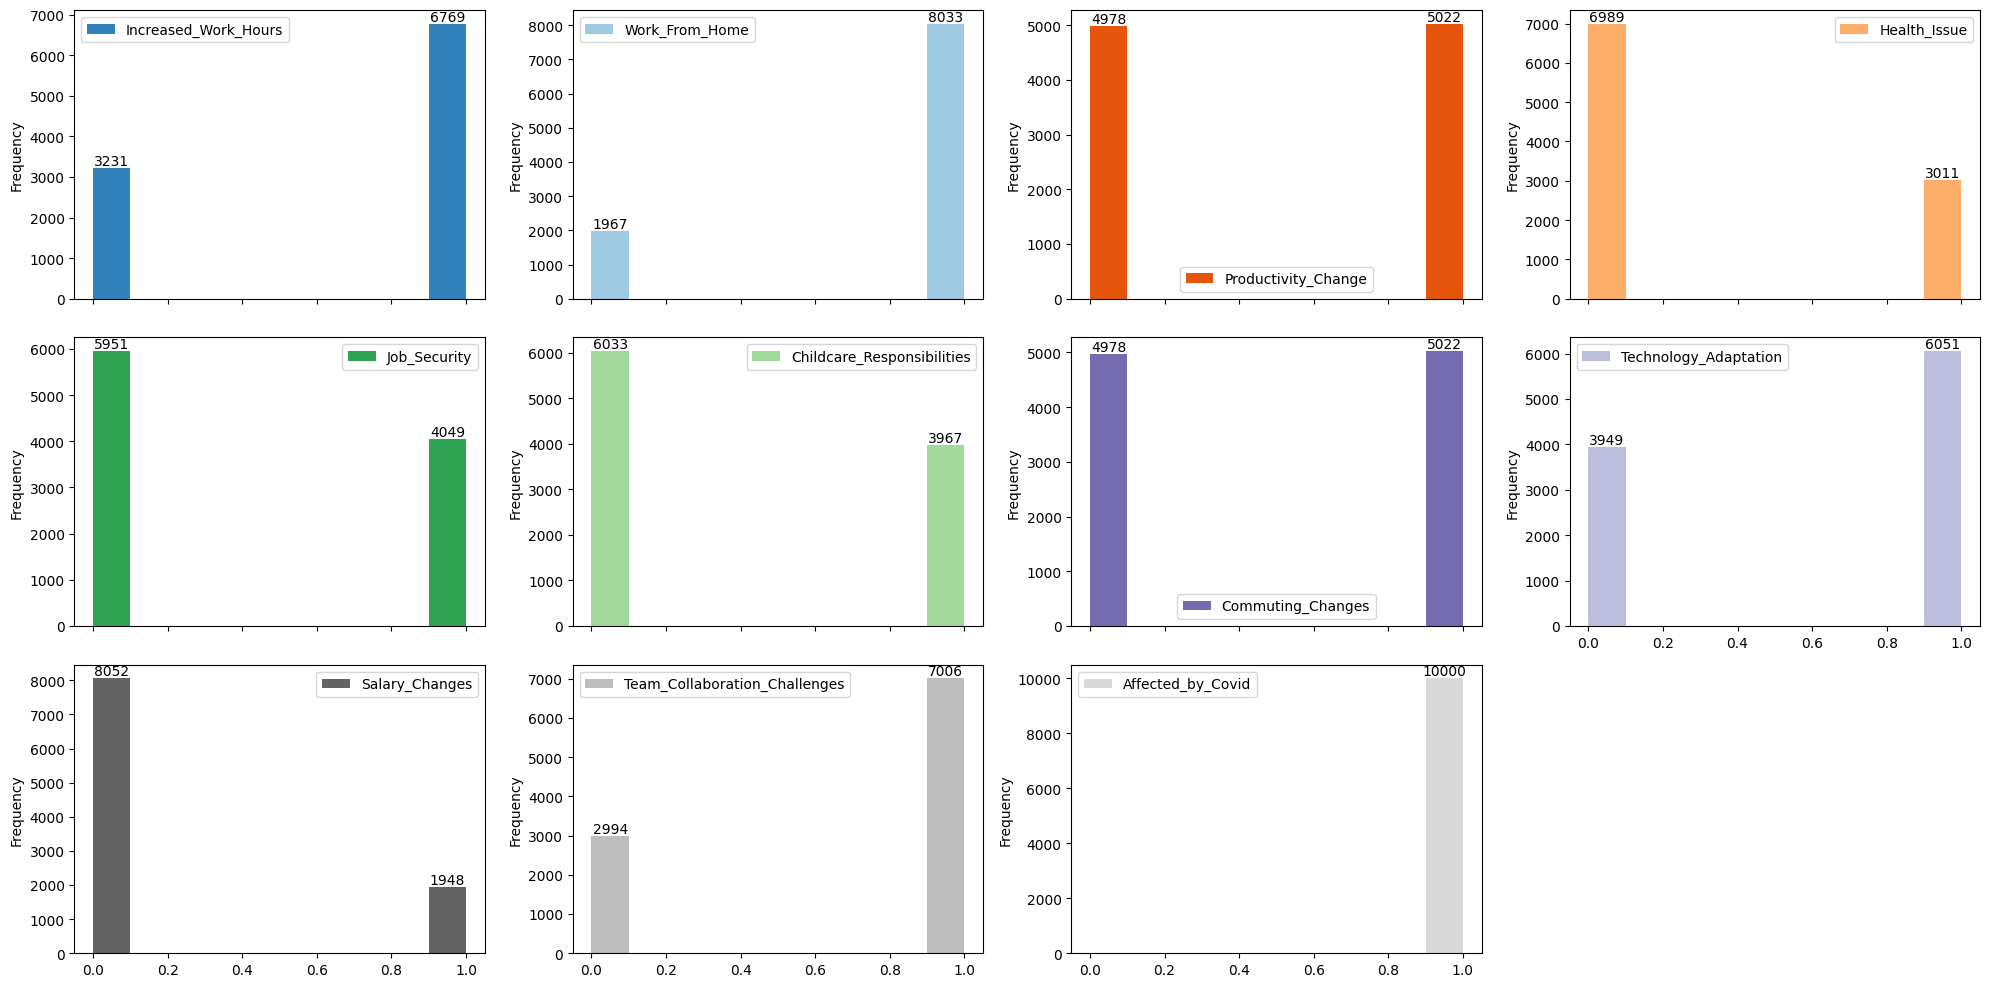

In [39]:
import matplotlib.pyplot as plt

# Your existing plotting code
axes = df.plot(
    kind='hist',
    subplots=True,
    layout=(3, 4),
    figsize=(20, 10),
    bins=10,
    use_index=False,
    colormap='tab20c'
)

# Annotate each histogram
for ax in axes.flatten():  # Flatten to loop through all subplots
    if ax:  # Check to avoid empty subplots in the grid
        for patch in ax.patches:  # Iterate through the bars
            height = patch.get_height()
            if height > 0:  # Only annotate non-empty bars
                ax.annotate(
                    f'{int(height)}',  # Format number as integer
                    (patch.get_x() + patch.get_width() / 2, height),  # Position: bar center and height
                    ha='center',  # Center horizontally
                    va='bottom',  # Place number above the bar
                    fontsize=10,  # Font size
                    color='black'  # Text color
                )

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


In [35]:
df.value_counts()

Stress_Level  Sector      Increased_Work_Hours  Work_From_Home  Hours_Worked_Per_Day   Meetings_Per_Day        Productivity_Change  Health_Issue  Job_Security  Childcare_Responsibilities  Commuting_Changes  Technology_Adaptation  Salary_Changes  Team_Collaboration_Challenges  Affected_by_Covid
High          Education   0                     0               1.032.381.723.925.600  3.845.056.609.954.760   1                    0             0             1                           1                  1                      0               1                              1                    1
Medium        Healthcare  0                     1               9.538.412.694.995.090  5.414.830.572.213.440   0                    1             0             1                           1                  0                      0               0                              1                    1
                                                                9.339.175.381.796.350  4.464.107.987.259.500   1                    1             0             0                           0                  1                      1               1                              1                    1
                                                                9.342.519.332.154.700  5.862.052.149.689.520   0                    0             0             1                           0                  1                      0               1                              1                    1
                                                                9.343.700.614.350.380  4.257.876.863.898.960   0                    0             0             0                           1                  1                      0               1                              1                    1
                                                                                                                                                                                                                                                                                                         ..
Low           Education   1                     1               5.583.296.101.008.800  4.213.174.254.348.660   1                    0             0             0                           0                  1                      1               1                              1                    1
                                                                5.617.411.788.229.970  4.770.839.076.640.630   1                    0             0             0                           1                  1                      0               1                              1                    1
                                                                5.632.764.673.607.200  2.845.574.649.574.710   1                    0             1             0                           1                  0                      0               1                              1                    1
                                                                5.648.040.392.465.780  38.135.427.830.669.100  1                    0             1             0                           0                  1                      1               1                              1                    1
Medium        Retail      1                     1               996.423.062.433.012    5.165.743.578.889.640   1                    0             1             0                           0                  1                      0               1                              1                    1
Name: count, Length: 10000, dtype: int64

In [40]:
df

,Stress_Level,Sector,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Affected_by_Covid
0,Low,Retail,1,1,6.392.393.639.805.820,26.845.944.014.488.700,1,0,0,1,1,1,0,1,1
1,Low,IT,1,1,9.171.983.537.957.560,33.392.245.834.602.800,1,0,1,0,1,1,0,1,1
2,Medium,Retail,1,0,10.612.560.951.456.400,2.218.332.712.302.110,0,0,0,0,0,0,0,0,1
3,Medium,Education,1,1,5.546.168.647.409.510,5.150.566.193.312.910,0,0,0,0,1,0,0,0,1
4,Medium,Education,0,1,11.424.615.456.733.800,31.211.255.258.841.200,1,0,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Medium,IT,1,1,7.961.822.499.528.110,228.385.715.074.039,1,1,1,1,0,0,0,1,1
9996,Medium,IT,0,0,10.917.085.531.320.900,36.214.061.959.290.800,0,0,0,1,0,1,0,0,1
9997,Low,Retail,1,1,1.017.621.058.520.080,10.396.886.350.092.200,1,0,1,0,1,1,1,1,1
9998,Medium,Education,1,1,11.903.972.863.377.200,3.756.724.961.448.690,0,1,1,0,1,1,1,1,1


8033




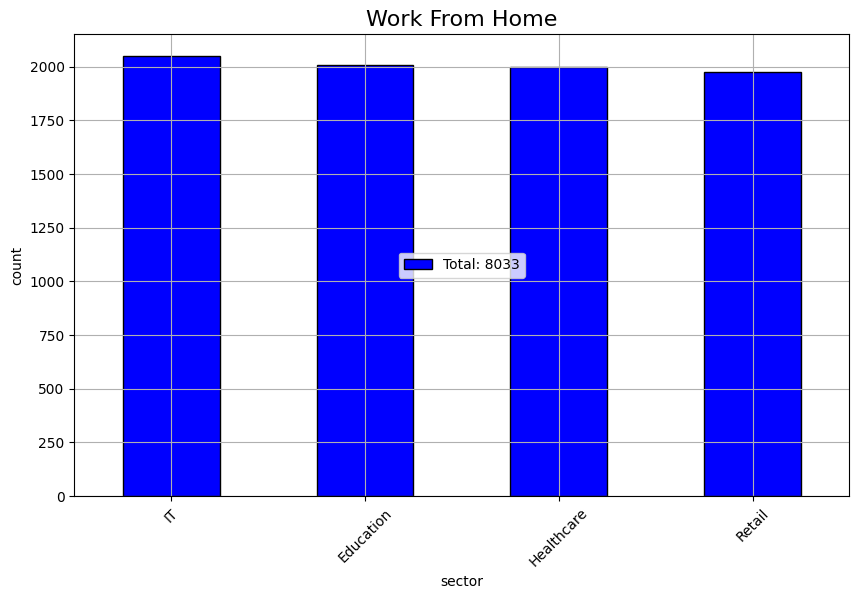

In [79]:
work_from_home_count = df[df["Work_From_Home"] == 1]["Sector"].value_counts()
plt.figure(figsize=(10, 6))
work_from_home_count.plot(kind="bar",color='blue', edgecolor='black')
plt.xlabel("sector")
plt.ylabel("count")
plt.title("Work From Home", fontsize=16)
plt.xticks(rotation=45)
plt.grid()
plt.legend([f"Total: {work_from_home_count.sum()}"], loc="center")
print(f"{work_from_home_count.sum()}\n\n")
plt.show()


8033




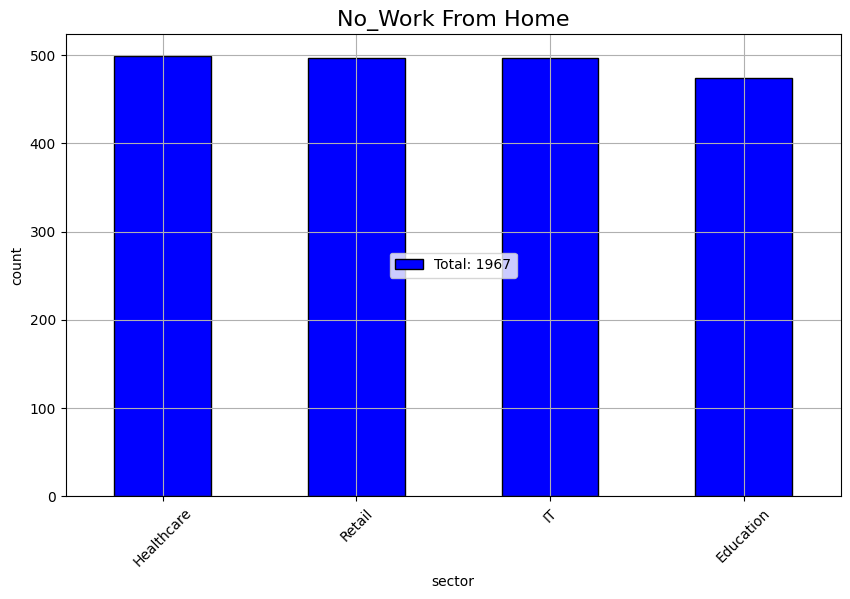

In [81]:
no_work_from_home_count = df[df["Work_From_Home"] == 0]["Sector"].value_counts()
plt.figure(figsize=(10, 6))
no_work_from_home_count.plot(kind="bar",color='blue', edgecolor='black')
plt.xlabel("sector")
plt.ylabel("count")
plt.title("No_Work From Home", fontsize=16)
plt.xticks(rotation=45)
plt.grid()
plt.legend([f"Total: {no_work_from_home_count.sum()}"], loc="center")
print(f"{work_from_home_count.sum()}\n\n")
plt.show()

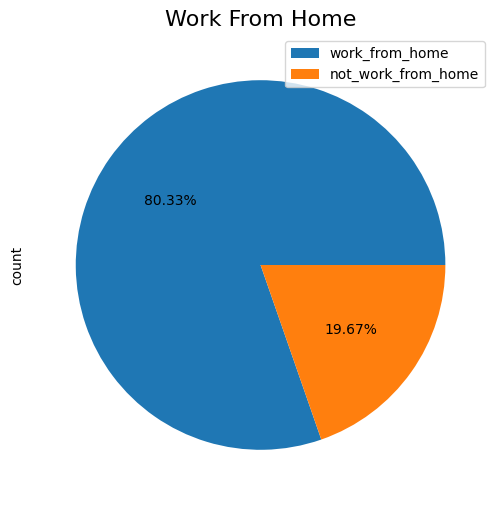

In [102]:
plt.figure(figsize=(10, 6))
df["Work_From_Home"].value_counts().plot(kind="pie",labels=df["Work_From_Home"].value_counts().index, autopct='%.2f%%',labeldistance=None)
plt.title("Work From Home", fontsize=16)
plt.legend(["work_from_home", "not_work_from_home"])
plt.show()

In [103]:
df

,Stress_Level,Sector,Increased_Work_Hours,Work_From_Home,Hours_Worked_Per_Day,Meetings_Per_Day,Productivity_Change,Health_Issue,Job_Security,Childcare_Responsibilities,Commuting_Changes,Technology_Adaptation,Salary_Changes,Team_Collaboration_Challenges,Affected_by_Covid
0,Low,Retail,1,1,6.392.393.639.805.820,26.845.944.014.488.700,1,0,0,1,1,1,0,1,1
1,Low,IT,1,1,9.171.983.537.957.560,33.392.245.834.602.800,1,0,1,0,1,1,0,1,1
2,Medium,Retail,1,0,10.612.560.951.456.400,2.218.332.712.302.110,0,0,0,0,0,0,0,0,1
3,Medium,Education,1,1,5.546.168.647.409.510,5.150.566.193.312.910,0,0,0,0,1,0,0,0,1
4,Medium,Education,0,1,11.424.615.456.733.800,31.211.255.258.841.200,1,0,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Medium,IT,1,1,7.961.822.499.528.110,228.385.715.074.039,1,1,1,1,0,0,0,1,1
9996,Medium,IT,0,0,10.917.085.531.320.900,36.214.061.959.290.800,0,0,0,1,0,1,0,0,1
9997,Low,Retail,1,1,1.017.621.058.520.080,10.396.886.350.092.200,1,0,1,0,1,1,1,1,1
9998,Medium,Education,1,1,11.903.972.863.377.200,3.756.724.961.448.690,0,1,1,0,1,1,1,1,1


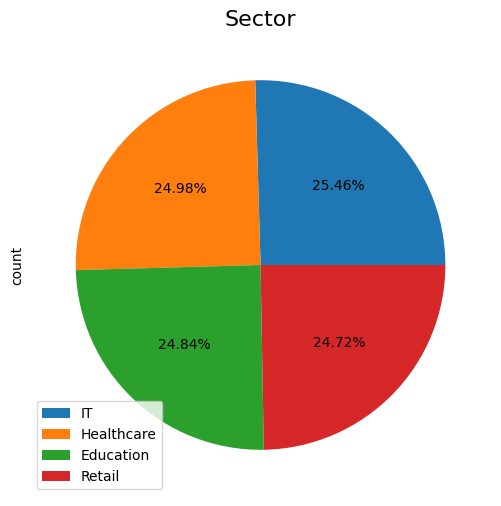

In [105]:
plt.figure(figsize=(10, 6))
df["Sector"].value_counts().plot(kind="pie",labels=df["Sector"].value_counts().index, autopct='%.2f%%',labeldistance=None)
plt.title("Sector", fontsize=16)
plt.legend(df["Sector"].value_counts().index)
plt.show()

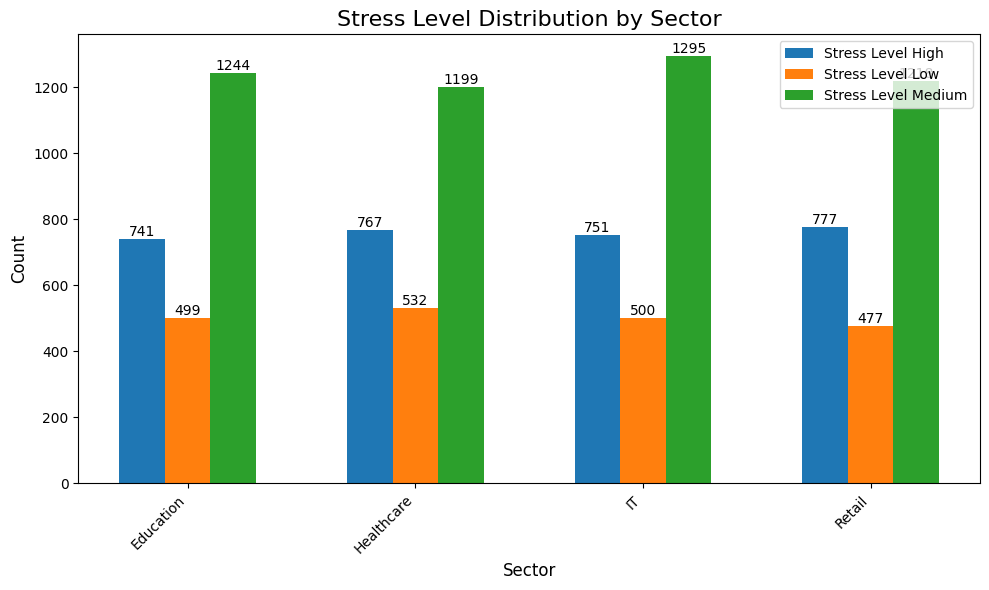

In [119]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Group data by sector and get the stress level counts for each sector
sector_stress_counts = df.groupby('Sector')['Stress_Level'].value_counts().unstack(fill_value=0)

# Get the sector names for the x-axis
sectors = sector_stress_counts.index

# Get the stress level counts for each sector
stress_level_counts = sector_stress_counts.values.T  # Transpose for plotting

# Create a bar plot for each stress level within each sector
width = 0.2  # Adjust width as needed
x_positions = np.arange(len(sectors))

# Plot bars for each stress level
for i, stress_level in enumerate(sector_stress_counts.columns):
    bars = plt.bar(
        x_positions + i * width,
        stress_level_counts[i],
        width=width,
        label=f'Stress Level {stress_level}'
    )
    # Annotate the bars with counts
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Only annotate non-zero bars
            plt.text(
                bar.get_x() + bar.get_width() / 2,  # Center the text horizontally
                height,  # Position above the bar
                f'{int(height)}',  # Display the count as an integer
                ha='center',  # Center the text
                va='bottom',  # Position the text above the bar
                fontsize=10  # Adjust font size as needed
            )

# Set labels and title
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Stress Level Distribution by Sector", fontsize=16)
plt.xticks(x_positions + (len(sector_stress_counts.columns) - 1) * width / 2, sectors, rotation=45, ha='right')
plt.legend()
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()
